In [15]:
library(ggplot2)
library(reshape2)

fmean = read.csv('./output/K2_L10_fmean')  # read csv file
fvar = read.csv('./output/K2_L10_fvar')

fmean$X <- fmean$X * 15/100

L  <- paste('Gene Cluster ', seq(1, 20), sep="")
K <- paste('Cell Line Cluster ', c(rep(2, 20), rep(1, 20)), sep="")

KL <- paste(K, L, sep="")

colnames(fmean) <- c('X', KL)
melted <- melt(fmean, id.vars = 'X')
melted$CellLineCluster <- substr(melted$variable, 1, 19)
melted$L <- substr(melted$variable, 20, 100)
melted$sd <-sqrt(melt(fvar, id.vars = 'X')$value)
melted$lower <- melted$value - 1.96 * melted$sd
melted$upper <- melted$value + 1.96 * melted$sd

plot = function(gene_cluster, name, ci=FALSE){
    data = melted[melted$L == gene_cluster, ]
    data0 = data[data$CellLineCluster == 'Cell Line Cluster 2',]
    data1 = data[data$CellLineCluster == 'Cell Line Cluster 1',]

    p <- ggplot(data, aes(x=X, y=value, color=CellLineCluster)) + geom_line() + theme(text = element_text(size=12), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
    if (ci){
        p <- p + geom_ribbon(data=data, aes(ymin=lower,ymax=upper, fill=CellLineCluster), alpha=0.3, colour=NA)
        p <- p + theme(legend.title=element_blank())
    }
    p <- p + ggtitle(paste(gene_cluster, name, sep=": ")) + labs(x = "Day", y = "Expression") + theme(plot.title = element_text(hjust = 0.5)) + theme(legend.position = c(0.8, 0.1))
    p <- p + scale_fill_manual(values=c("slateblue3","chartreuse3"))+ scale_color_manual(values=c("slateblue3","chartreuse3"))
    return(p)
}


myogenesis = function(){
    return(plot('Gene Cluster 17', 'Myogenesis', FALSE))
}

myogenesis_ci = function(){
    return(plot('Gene Cluster 17', 'Myogenesis', TRUE))
}

coagulation = function(){
    return(plot('Gene Cluster 12', 'Coagulation, KRAS', FALSE))
}

coagulation_ci = function(){
    return(plot('Gene Cluster 12', 'Coagulation, KRAS', TRUE))
}

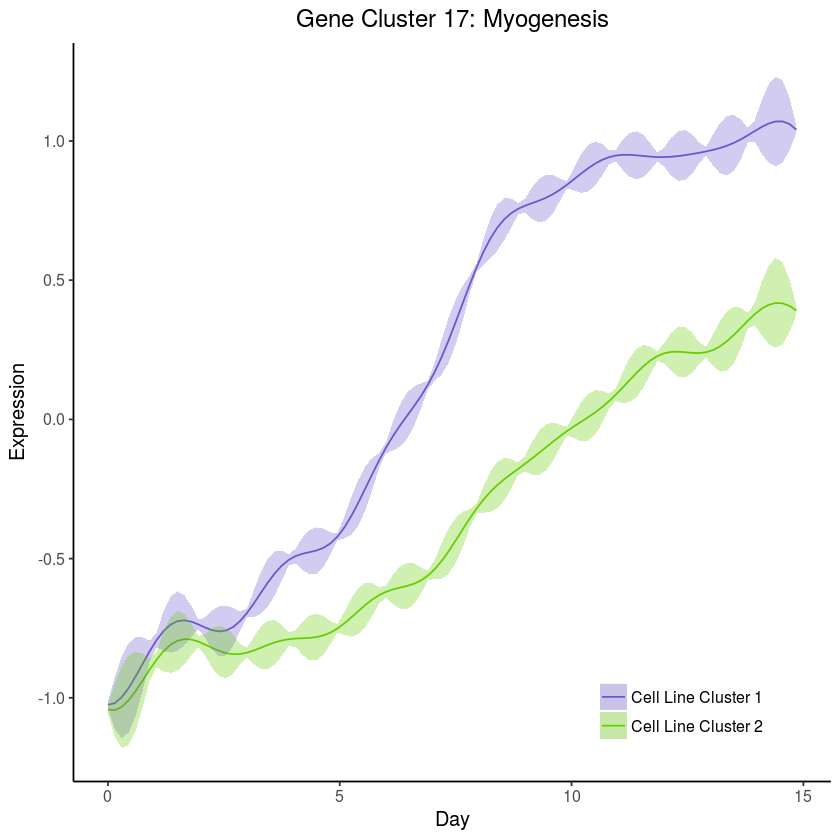

In [16]:
p <- myogenesis_ci()
ggsave(p, file='./output/myogenesis_trajectory.png', width=7.2, height=5, units="in", device = 'png'
      )
p

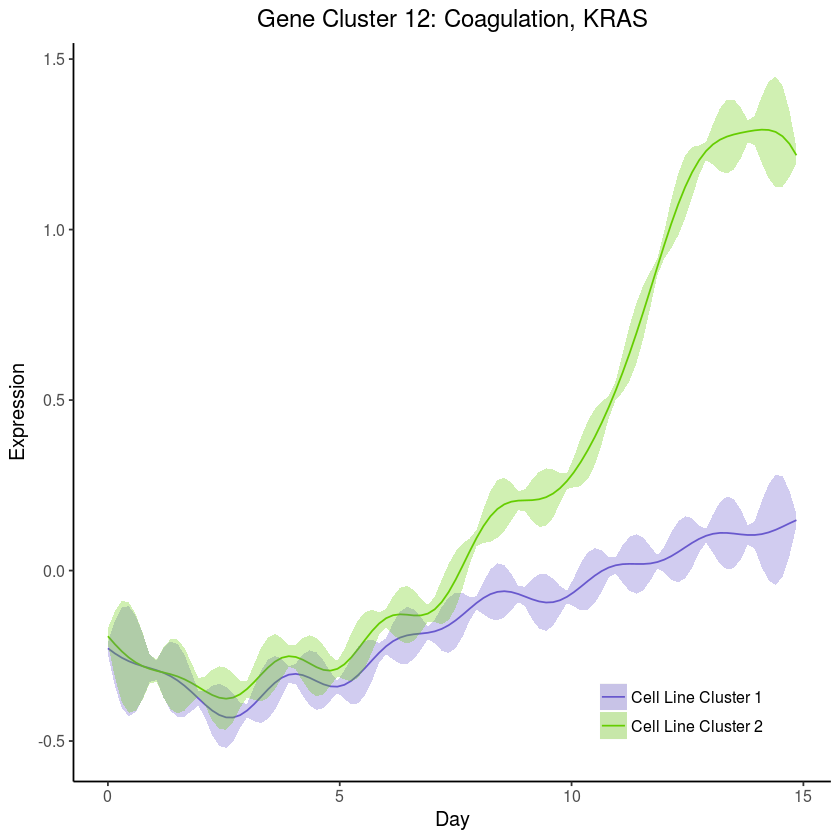

In [17]:
p <- coagulation_ci()
ggsave(p, file='./output/kras_coag_trajectory', width=7.2, height=5, units="in", device = 'png'
      )
p

In [18]:
neworder <- L
library(plyr)  ## or dplyr (transform -> mutate)
melted2 <- arrange(transform(melted,
             L=factor(L,levels=neworder)),L)

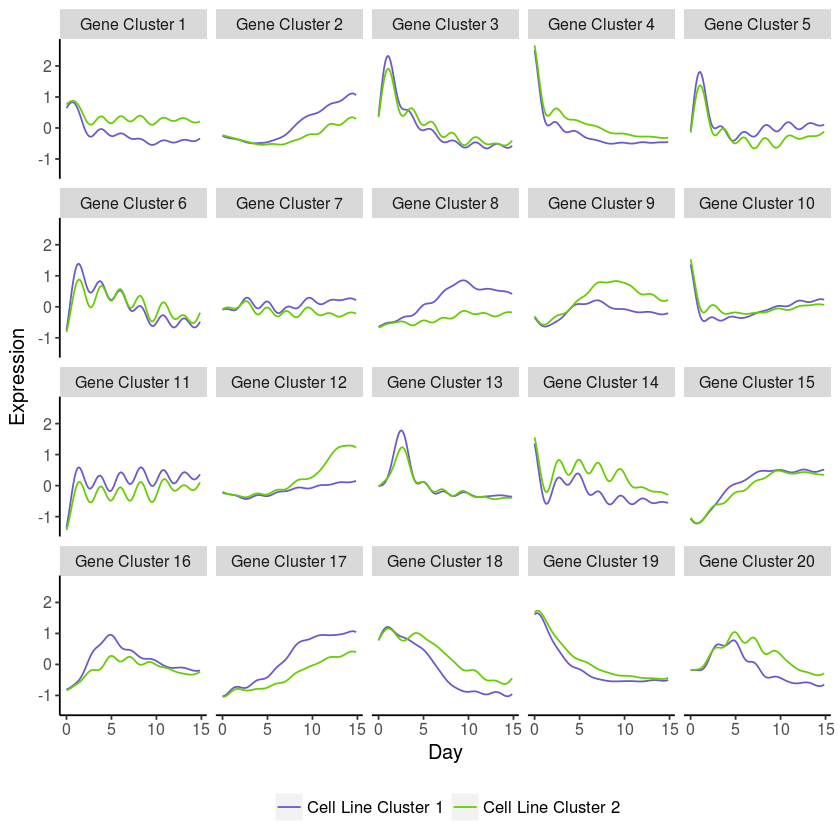

In [21]:
p <- ggplot(melted2, aes(x=X, y=value, color=CellLineCluster)) + facet_wrap('L') + geom_line() + theme(text = element_text(size=12), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))
p <- p + labs(x = "Day", y = "Expression", color = "Cell Line Cluster") + theme(plot.title = element_text(hjust = 0.5)) + theme(legend.position = 'bottom')
p <- p + theme(legend.text = element_text(size=10))+ theme(legend.title = element_text(size=10)) + theme(text = element_text(size=12))
p <- p + scale_fill_manual(values=c("slateblue3","chartreuse3"))+ scale_color_manual(values=c("slateblue3","chartreuse3"))
p <- p + theme(legend.title=element_blank())

ggsave(p, file='./output/trajectory_summary.png', width=7.2, height=5, units="in", device = 'png')
p